In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import category_encoders as ce
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder
import pickle

In [2]:
df = pd.read_csv('IMDB.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [5]:
mean_rating=df['Rating'].mean()
df['Rating'].fillna(mean_rating,inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_15980\1156281357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(mean_rating,inplace=True)


In [6]:
def clean_currency(value):
    if isinstance(value, str):  # Only apply cleaning if the value is a string
        # Remove dollar sign
        value = value.replace('$', '')
        value = value.replace(',', '')
        # Handle 'M' for millions and 'K' for thousands
        if 'M' in value:
            value = value.replace('M', '')
            value = float(value) * 1_000_000
        elif 'K' in value:
            value = value.replace('K', '')
            value = float(value) * 1_000
        else:
            value = float(value)  # Convert the cleaned string to a float
    return value

In [7]:
df['Votes'] = df['Votes'].apply(clean_currency)
df['Votes'] = df['Votes'].astype(float)
mean_votes = df['Votes'].median()
df['Votes'].fillna(mean_votes, inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_15980\613823185.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'].fillna(mean_votes, inplace=True)


In [8]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
mode_year = df['Year'].mode()
df['Year'].fillna(mode_year.iloc[0], inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_15980\3140003891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(mode_year.iloc[0], inplace=True)


In [10]:
mode_Duration = df['Duration'].mode()
df['Duration'].fillna(mode_Duration.iloc[0], inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_15980\3721337211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(mode_Duration.iloc[0], inplace=True)


In [11]:
mode_Duration = df['Genre'].mode()
df['Genre'].fillna(mode_Duration.iloc[0], inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_15980\1643869288.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna(mode_Duration.iloc[0], inplace=True)


In [12]:
df.isna().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [13]:
df = df.dropna(subset=['Actor 3'])
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [14]:
df['Year'] = df['Year'].astype(str).str.replace('[^0-9]', '', regex=True)
df['Year'] = df['Year'].astype(int)
year_count = df['Year'].value_counts().sort_index()
year_count

Year
1915      1
1917      1
1928      2
1930      1
1931     20
       ... 
2018    304
2019    641
2020    263
2021    321
2022     19
Name: count, Length: 96, dtype: int64

In [15]:
df['Duration'] = df['Duration'].astype(str).str.replace('[^0-9]', '', regex=True)
df['Duration'] = df['Duration'].astype(int)

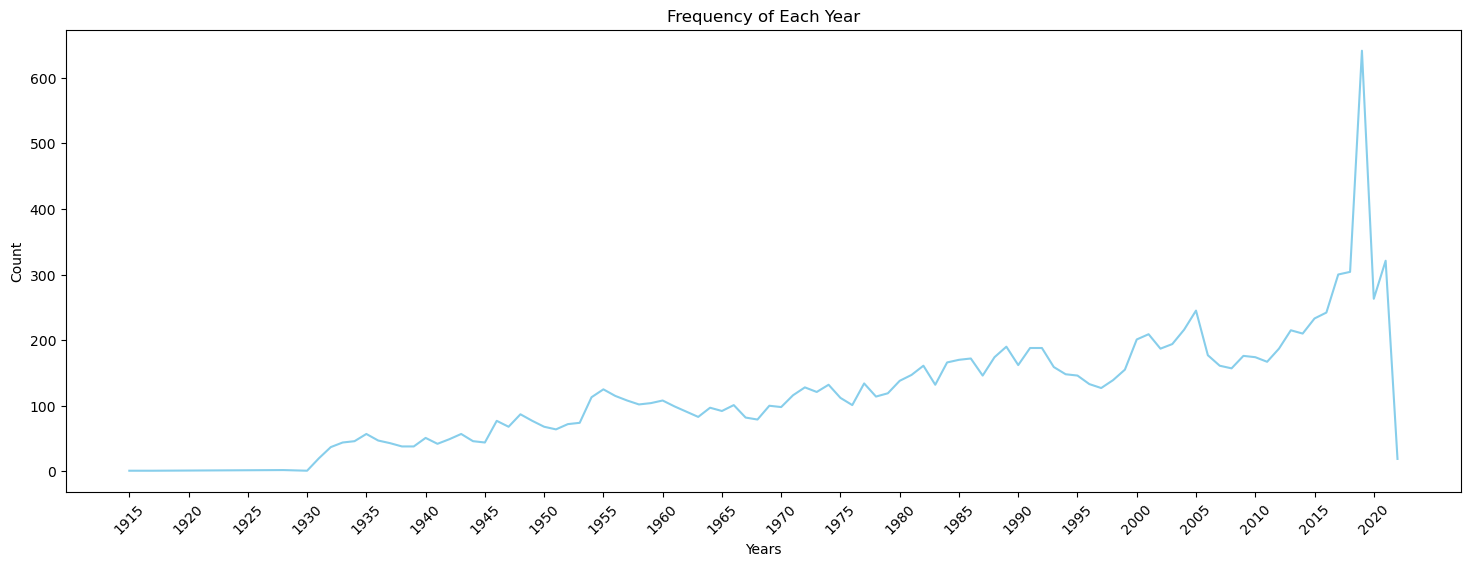

In [16]:
  # Sort by year in ascending order

# Create the line plot
plt.figure(figsize=(18, 6))
year_count.plot(kind='line', color='skyblue')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Frequency of Each Year')

# Set x-axis ticks to show every 5 years
years = year_count.index  # Get the sorted years
plt.xticks(ticks=range(min(years), max(years) + 1, 5), rotation=45)  # Set ticks every 5 years

# Show the plot
plt.show()


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12365 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      12365 non-null  object 
 1   Year      12365 non-null  int32  
 2   Duration  12365 non-null  int32  
 3   Genre     12365 non-null  object 
 4   Rating    12365 non-null  float64
 5   Votes     12365 non-null  float64
 6   Director  12365 non-null  object 
 7   Actor 1   12365 non-null  object 
 8   Actor 2   12365 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), int32(2), object(6)
memory usage: 966.0+ KB


In [28]:
df=df.drop(columns='Name')

KeyError: "['Name'] not found in axis"

In [19]:
X=df.drop(columns='Rating')
Y=df['Rating']
print(X.shape)
print(Y.shape)

(12365, 8)
(12365,)


In [20]:

# Initialize TargetEncoder
encoder = TargetEncoder(cols=['Genre', 'Director','Actor 1','Actor 2','Actor 3'])
X_encoded = encoder.fit_transform(X, Y)

# Convert all values to numeric and handle missing values
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
print(X_encoded.head())

# Handle missing values if necessary
X_encoded.fillna(X_encoded.mean(), inplace=True)  # Impute missing values with mean

# Apply PCA
pca = PCA(n_components=8)  # Adjust the number of components as needed
X = pca.fit_transform(X_encoded)
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)
    
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)
X

   Year  Duration     Genre  Votes  Director   Actor 1   Actor 2   Actor 3
0  2019       120  6.031166   55.0  5.817804  5.827849  5.595581  5.827849
1  2019       109  6.031166    8.0  5.978375  5.970889  5.978375  5.978375
2  2021        90  6.295986   55.0  5.827660  5.910008  5.983379  5.827660
3  2019       110  5.716786   35.0  5.640093  5.751586  5.640093  5.630446
4  2010       105  6.031166   55.0  5.919273  6.019702  5.810396  5.782575


array([[-1.62373187e+03,  3.01274068e+01,  4.30591133e+00, ...,
         1.40159326e-01, -1.38418621e-01,  8.71651647e-02],
       [-1.67073197e+03,  3.37955832e+01, -6.06433481e+00, ...,
        -8.05036929e-02,  2.06595666e-02,  5.21000027e-02],
       [-1.62373213e+03,  4.20187244e+01, -2.33096887e+01, ...,
         6.53762762e-02,  1.32997991e-01, -5.49916724e-02],
       ...,
       [-1.66773230e+03,  9.05045082e-01, -6.03293704e+00, ...,
         3.98540794e-01, -6.15109128e-02,  3.59135192e-02],
       [-1.02373206e+03,  8.26730874e+00,  6.11236411e+00, ...,
         1.03754629e-02, -1.53643907e-01,  4.09004333e-02],
       [-1.65873206e+03,  6.99755663e+00,  6.73036142e+00, ...,
         4.08829699e-01,  2.36898931e-01,  1.67478517e-01]])

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [22]:
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.52
Mean Squared Error (MSE): 0.52
R² Score: 0.55


In [24]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.34
Mean Squared Error (MSE): 0.32
R² Score: 0.73


In [27]:
import pandas as pd
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the encoder and PCA model
with open('encoder.pkl', 'rb') as file:
    encoder = pickle.load(file)

with open('pca.pkl', 'rb') as file:
    pca = pickle.load(file)

def predict_rating(year, duration, genre, votes, director, actor1, actor2, actor3):
    # Create a DataFrame from the user input
    user_data = pd.DataFrame({
        'Year': [year],
        'Duration': [duration],
        'Genre': [genre],
        'Votes': [votes],
        'Director': [director],
        'Actor 1': [actor1],
        'Actor 2': [actor2],
        'Actor 3': [actor3]
    })
    
    # Encode categorical features
    user_data_encoded = encoder.transform(user_data)
    
    # Convert all values to numeric and handle missing values
    user_data_encoded = user_data_encoded.apply(pd.to_numeric, errors='coerce')
    user_data_encoded.fillna(user_data_encoded.mean(), inplace=True)  # Impute missing values with mean
    
    # Apply PCA
    user_data_pca = pca.transform(user_data_encoded)
    
    # Predict the rating
    predicted_rating = model.predict(user_data_pca)
    return predicted_rating[0]

def menu():
    print("Enter the movie details:")
    year = int(input("Year: "))
    duration = float(input("Duration (in minutes): "))
    genre = input("Genre: ")
    votes = float(input("Votes: "))
    director = input("Director: ")
    actor1 = input("Actor 1: ")
    actor2 = input("Actor 2: ")
    actor3 = input("Actor 3: ")
    
    rating = predict_rating(year, duration, genre, votes, director, actor1, actor2, actor3)
    print(f"Predicted Rating: {rating:.2f}")

# Run the menu
menu()

Enter the movie details:


Year:  2019
Duration (in minutes):  120
Genre:  Drama
Votes:  55
Director:  J.S. Randhawa
Actor 1:  Manmauji
Actor 2:  Birbal
Actor 3:  Rajendra Bhatia


Predicted Rating: 5.90
